In [1]:
import numpy as np
import matplotlib.pyplot as plt
from unit_tests.Linear_Regression_1_feat import compute_cost_test, compute_gradient_test

# 1. Dataset
- Predict company profit based on city population

| Population in 10,000 (float) | Profit in \$10,000 (float) |
|------------------------------|---------------------------|
| $x^{(i)}$                          | $y^{(i)}$                       |

In [2]:
def load_data(f_path):
    data = np.loadtxt(f_path, delimiter=',')
    X = data[:,0]
    y = data[:,1]
    return X, y

In [3]:
x_train, y_train = load_data('datasets/ex1data1.txt')
print(f'{x_train.shape = }')
print(f'{y_train.shape = }')
print()
print(f'{x_train[:5] = }')
print(f'{y_train[:5] = }')

x_train.shape = (97,)
y_train.shape = (97,)

x_train[:5] = array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598])
y_train[:5] = array([17.592 ,  9.1302, 13.662 , 11.854 ,  6.8233])


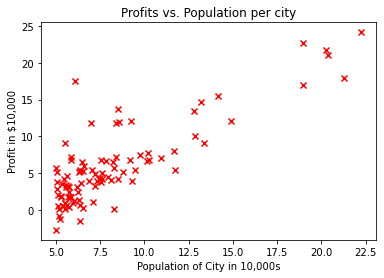

In [4]:
plt.scatter(x_train, y_train, marker='x', c='r') 

plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

# 2. Model
#### Notation

$$x^{(i)}$$
+ $(i)$: data point i-th (m data points)

#### Linear Regression

$$\hat{y}^{(i)} = f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

In [5]:
def f(x, w, b):
    """
    predict using linear regression

    Args:
        x (ndarray): Shape (m,) example with 1 features
        w (scalar): model parameters   
        b (scalar): model parameter
    Returns:
        y_hat: predict, Shape (m,)
    """
    return w*x + b

# 3. Cost function

#### MSE Cost function

$$\begin{split}
    J(w,b) &= \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (\hat{y}^{(i)} - y^{(i)})^2 \\
        &= \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 
\end{split}$$ 

- which:
    + $m$: dataset size

In [6]:
# Method 1: Loop
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.

    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """

    # number of training examples
    m = x.shape[0]

    cost = 0.0
    for i in range(m):
        y_hat_i = f(x[i], w, b)
        cost += (y_hat_i - y[i])**2

    return cost/(2*m)

# TEST
compute_cost_test(compute_cost)

All tests passed!


In [7]:
# Method 2: Vectorwise
def compute_cost_vector_wise(x, y, w, b):
    """
    Computes the gradient for linear regression
     Args:
      x (ndarray (m,)): Data, m examples with 1 features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      verbose : (Boolean) If true, print out intermediate value f_wb
    Returns
      cost: (scalar)
    """
    m = x.shape[0]

    # calculate y_hat for all examples.
    y_hat = f(x, w, b)

    # calculate cost
    total_cost = (1/(2*m)) * np.sum((y_hat-y)**2)

    return total_cost

# TEST
compute_cost_test(compute_cost_vector_wise)

All tests passed!


# 4. Gradient
#### Gradient of cost function
$$\begin{split}
\frac{\partial J(w,b)}{\partial w}  &= \frac{\partial \left( \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (wx^{(i)} + b - y^{(i)})^2 \right)}{\partial w} \\
     &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (wx^{(i)} + b - y^{(i)})  x^{(i)} \\
     &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}^{(i)} - y^{(i)})  x^{(i)} \\
\end{split}$$

$$\begin{split}
\frac{\partial J(w,b)}{\partial b}  &= \frac{\partial \left( \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (wx^{(i)} + b - y^{(i)})^2 \right)}{\partial b} \\
     &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (wx^{(i)} + b - y^{(i)}) \\
     &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}^{(i)} - y^{(i)}) \\
\end{split}$$


#### Update w, b
+ $\alpha$: Learning rate

$$\text{repeat until convergence: } \\
\begin{cases}
    w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \\
    b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}
\end{cases}$$

In [8]:
# Method 1: Loop
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]

    # Compute Grad
    dj_dw = 0
    dj_db = 0
    for i in range(m):  
        y_hat_i = f(x[i], w, b) 

        dj_dw += (y_hat_i - y[i]) * x[i]
        dj_db += y_hat_i - y[i]

    return dj_dw / m, dj_db / m

# TEST
compute_gradient_test(compute_gradient)

Using X with shape (4, 1)
All tests passed!


In [9]:
# Method 2: Vectorwise
def compute_gradient_vector_wise(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # calculate y_hat for all examples.
    y_hat = f(x, w, b)

    # Compute Grad
    dj_dw = 1./m * np.sum((y_hat-y)*x)
    dj_db = 1./m * np.sum(y_hat-y)

    return dj_dw, dj_db

# TEST
compute_gradient_test(compute_gradient_vector_wise)

Using X with shape (4, 1)
All tests passed!


# 5. Train - Gradient Descent

In [10]:
import math


def fit(
        x, y,
        w_init, b_init,
        alpha, num_iters,
        cost_fn, gradient_fn): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_init, b_init (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_fn:     function to call to produce cost
      gradient_fn: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      params_history (list): History of parameters [w,b] 
      """
    # cost and params history
    J_history = []
    params_history = []
 
    # Gradient descent
    w = w_init
    b = b_init
    for i in range(num_iters):
        # Calculate the gradient
        dj_dw, dj_db = gradient_fn(x, y, w , b)     

        # Update w, b
        w -= alpha * dj_dw                            
        b -= alpha * dj_db                            

        # Save cost J at each iteration
        if i<100000:
            J_history.append( cost_fn(x, y, w , b) )
            params_history.append( [w,b] )

        # Print
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:.3f} ")
 
    return w, b, J_history, params_history

In [11]:
initial_w = np.random.random()
initial_b = np.random.random()

w_final, b_final, J_hist, p_hist = fit(
    x=x_train , y=y_train,
    w_init=initial_w, b_init=initial_b,
    alpha=1e-2, num_iters=10000,
    cost_fn=compute_cost, gradient_fn=compute_gradient)
print(f"\tFinal: (w,b): ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 6.453 
Iteration 1000: Cost 4.529 
Iteration 2000: Cost 4.478 
Iteration 3000: Cost 4.477 
Iteration 4000: Cost 4.477 
Iteration 5000: Cost 4.477 
Iteration 6000: Cost 4.477 
Iteration 7000: Cost 4.477 
Iteration 8000: Cost 4.477 
Iteration 9000: Cost 4.477 
	Final: (w,b): (  1.1930, -3.8958)


#### Training param plot

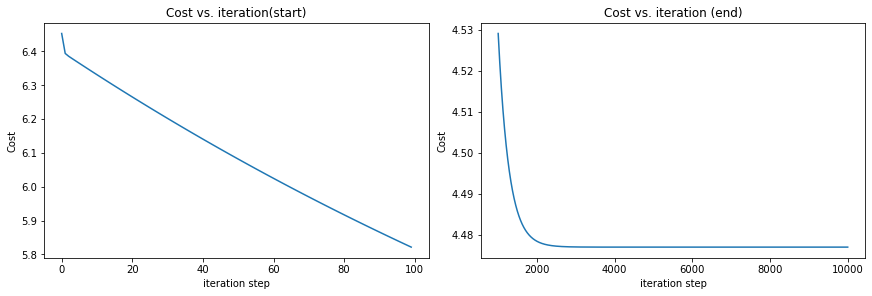

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))

ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

# 6. Inference

#### Plot Regression Line

In [13]:
y_hat = f(x_train, w_final, b_final)

Text(0.5, 0, 'Population of City in 10,000s')

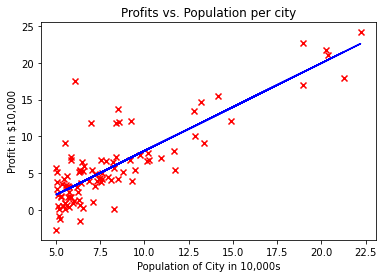

In [14]:
# Scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Plot the linear fit
plt.plot(x_train, y_hat, c = "b")

plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')

#### Inference

In [15]:
y_hat = f(3.5, w_final, b_final)
print('For population = 35,000, we predict a profit of $%.2f' % (y_hat*10000))

y_hat = f(7.0, w_final, b_final)
print('For population = 70,000, we predict a profit of $%.2f' % (y_hat*10000))

For population = 35,000, we predict a profit of $2798.37
For population = 70,000, we predict a profit of $44554.55


#### R2 Score

In [16]:
from sklearn.metrics import r2_score

y_hat = f(x_train, w_final, b_final)
r2 = r2_score(
    y_true=y_train,
    y_pred=y_hat)
print(f'R2 = {r2:.3f}')

R2 = 0.702
